In [21]:
#importing the dependencies
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load data
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Exploratory Data Analysis
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution between legit transactions and fradulent transactions
df['Class'].value_counts()
#we can observe that this dataset is highly unbalanced

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#separating the data for analysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#compare the values of both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#under sampling-we construct a sample dataset containing similar distribution of normal transactions and fraud transactions
#number of fraudulent transactions is 492 and normal transactions is 284315
legit_sample=legit.sample(n=492)

In [ ]:
#concatenating two DataFrames
new_df=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26394,34042.0,1.097986,-0.165431,-0.627863,0.202711,0.365279,-0.131542,0.425670,-0.098684,-0.307819,...,-0.350608,-1.373402,-0.132951,-1.009930,0.375355,0.191655,-0.095345,0.006265,128.90,0
84888,60508.0,-1.539349,1.470896,0.527982,2.503185,0.297200,0.870486,-0.283120,0.910565,-0.923625,...,-0.253490,-0.808080,0.150849,-1.441586,-0.345312,0.034150,-0.379126,-0.212465,1.99,0
53949,46226.0,-0.586757,1.053542,1.632365,-0.115709,-0.138822,-0.692197,0.582674,0.041920,-0.573158,...,-0.147018,-0.460314,0.000510,0.510489,-0.269113,0.028808,0.123212,0.111658,1.79,0
4709,4138.0,-0.923382,1.255816,1.517909,-0.045236,0.222085,-0.702360,0.914644,-0.614043,1.508458,...,-0.280060,-0.261849,0.053056,0.449324,-0.822679,-0.119355,-0.418062,-0.155280,7.59,0
93950,64660.0,-0.508654,1.009356,0.494376,1.232438,2.439447,4.357840,-0.138498,1.031219,-0.862401,...,-0.260863,-0.899144,0.020888,0.959920,-0.489438,-0.278165,-0.098384,0.155022,7.75,0


In [ ]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91087.107724,-0.058638,0.098995,0.098297,-0.040663,0.075942,-0.099581,0.082912,0.063243,0.041553,...,-0.023605,0.011157,-0.048353,-0.022994,0.033722,0.016128,-0.028969,-0.003033,0.008970,79.084634
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#splitting the data into features and targets
X=new_df.drop(columns='Class',axis=1)
Y=new_df['Class']

In [ ]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
26394    34042.0  1.097986 -0.165431 -0.627863  0.202711  0.365279 -0.131542   
84888    60508.0 -1.539349  1.470896  0.527982  2.503185  0.297200  0.870486   
53949    46226.0 -0.586757  1.053542  1.632365 -0.115709 -0.138822 -0.692197   
4709      4138.0 -0.923382  1.255816  1.517909 -0.045236  0.222085 -0.702360   
93950    64660.0 -0.508654  1.009356  0.494376  1.232438  2.439447  4.357840   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

26394     0
84888     0
53949     0
4709      0
93950     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
#split the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
md=LogisticRegression()

In [ ]:
md.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_predict=md.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict,Y_train)

In [ ]:
print(f'Accuracy on the training data is {training_data_accuracy}')

Accuracy on the training data is 0.9453621346886912


In [ ]:
X_test_predict=md.predict(X_test)
test_data_accuracy=accuracy_score(X_test_predict,Y_test)

In [ ]:
print(f'Accuracy on the test data is {test_data_accuracy}')

Accuracy on the test data is 0.934010152284264


# **II Part-->**

Different Method


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
dataset=pd.read_csv('/content/creditcard.csv')

In [ ]:
ds=dataset.head(10)

In [ ]:
ds=dataset.iloc[:,:-1].values

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140698,83876,1.297031,0.260234,-0.165836,0.304460,0.238056,-0.084983,-0.056115,0.029952,-0.115999,...,-0.315545,-0.948937,-0.024322,-0.883643,0.335230,0.150161,-0.029612,0.008220,0.99,0.0
140699,83876,1.200272,0.259410,0.397862,0.631576,-0.476806,-0.882324,-0.062362,-0.028223,-0.130967,...,-0.231443,-0.739076,0.151545,0.475489,0.134602,0.066882,-0.031207,0.020989,0.89,0.0
140700,83877,-0.939078,1.234767,1.433774,-0.097576,-0.255769,-0.689204,0.509961,0.153369,0.179511,...,-0.257956,-0.582912,0.080816,0.334513,-0.257496,0.094942,0.487942,0.239537,4.49,0.0
140701,83879,1.170286,0.563313,-0.271928,1.394477,-0.038260,-1.000654,0.126524,-0.031662,0.139095,...,-0.038141,-0.086158,-0.033513,0.220516,0.517620,-0.312217,0.041102,0.053760,1.00,0.0


In [ ]:
sim=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)

In [ ]:
sim=sim.fit(dataset)
data = pd.DataFrame(sim.transform(dataset), columns=dataset.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


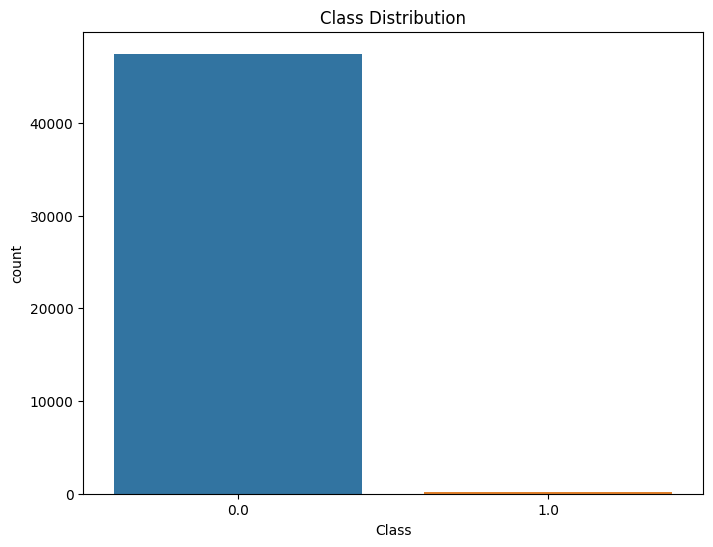

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=dataset)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


In [ ]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
# Predict on test set and evaluate the model
y1_pred = model.predict(X1_test)
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("\nAccuracy Score:")
print(accuracy_score(y1_test, y1_pred))
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

Confusion Matrix:
[[71183     8]
 [   21    97]]

Accuracy Score:
0.9995933192163682

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71191
         1.0       0.92      0.82      0.87       118

    accuracy                           1.00     71309
   macro avg       0.96      0.91      0.93     71309
weighted avg       1.00      1.00      1.00     71309



# **III Part:**

Using Random Forest algorithm

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the data from CSV file
dss = pd.read_csv("/content/creditcard.csv")

dss = dss.dropna()

# Split the data into features (X) and target (y)
X2 = dss.drop("Class", axis=1)
y2 = dss["Class"]

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X2_train, y2_train)

# Predict the test data
y2_pred = rf_model.predict(X2_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred)
roc_auc = roc_auc_score(y2_test, y2_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.9996137776061234
Precision: 0.9478260869565217
Recall: 0.8014705882352942
F1 score: 0.8685258964143425
ROC AUC score: 0.9007001270152991


# **IV Part:**
Using Isolation Forest Algorithm

In [1]:
# Import libraries
from sklearn.ensemble import IsolationForest

In [4]:
# Load dataset
data2 = pd.read_csv('/content/creditcard.csv')

In [5]:
# Handle null values
data2 = data2.dropna()

In [8]:
# Balancing classes as there is an imbalance in the datset
frauds = data2[data2.Class == 1]
non_frauds = data2[data2.Class == 0].sample(n=len(frauds))
data = pd.concat([frauds, non_frauds])

In [9]:
# Split dataset into training and testing set
X3 = data.drop('Class', axis=1)
y3 = data['Class']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [10]:
# Scale features
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [11]:
# Creating model using isolation forest
ifa = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42) 

In [12]:
ifa.fit(X3_train)

IsolationForest(contamination=0.1, random_state=42)

In [13]:
# Make predictions
y3_pred_train = ifa.predict(X3_train)
y3_pred_test = ifa.predict(X3_test)

In [14]:
# Convert predictions to binary
y3_pred_train[y3_pred_train == 1] = 0
y3_pred_train[y3_pred_train == -1] = 1
y3_pred_test[y3_pred_test == 1] = 0
y3_pred_test[y3_pred_test == -1] = 1

In [15]:
# Evaluate model
print(f'Training Set:{classification_report(y3_train, y3_pred_train)}')
print(f'Testing Set:{classification_report(y3_test, y3_pred_test)}')

Training Set:              precision    recall  f1-score   support

         0.0       0.54      0.99      0.70        81
         1.0       0.94      0.19      0.31        85

    accuracy                           0.58       166
   macro avg       0.74      0.59      0.50       166
weighted avg       0.74      0.58      0.50       166

Testing Set:              precision    recall  f1-score   support

         0.0       0.56      0.96      0.71        23
         1.0       0.67      0.11      0.18        19

    accuracy                           0.57        42
   macro avg       0.62      0.53      0.45        42
weighted avg       0.61      0.57      0.47        42



In [22]:
accuracy_1 = accuracy_score(y3_test, y3_pred_test)
precision_1 = precision_score(y3_test, y3_pred_test)
recall_1 = recall_score(y3_test, y3_pred_test)
f1_1 = f1_score(y3_test, y3_pred_test)
roc_auc_1 = roc_auc_score(y3_test, y3_pred_test)

print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1 score:", f1_1)
print("ROC AUC score:", roc_auc_1)

Accuracy: 0.5714285714285714
Precision: 0.6666666666666666
Recall: 0.10526315789473684
F1 score: 0.18181818181818182
ROC AUC score: 0.5308924485125858


# **V Part:**

Using SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
# Load dataset
datav = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Split dataset into training and testing set
X4 = datav.drop('Class', axis=1)
y4 = datav['Class']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

In [ ]:
svm= OneClassSVM(kernel='rbf', nu=0.05)
svm.fit(X_train)

OneClassSVM(nu=0.001)

In [ ]:
y4_pred_train = svm.predict(X4_train)
y4_pred_test = svm.predict(X4_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


In [ ]:
# Convert predictions to binary
y4_pred_train[y4_pred_train == 1] = 0
y4_pred_train[y4_pred_train == -1] = 1
y4_pred_test[y4_pred_test == 1] = 0
y4_pred_test[y4_pred_test == -1] = 1

In [ ]:
# Evaluate model
print(f'Training Set:{classification_report(y4_train, y4_pred_train)}')
print(f'Testing Set:{classification_report(y4_test, y4_pred_test)}')

Training Set:              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.50      1.00      0.67       393

    accuracy                           0.50       787
   macro avg       0.25      0.50      0.33       787
weighted avg       0.25      0.50      0.33       787

Testing Set:              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.50      1.00      0.67        99

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.34       197



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

# **Comaparing the different algorithms we used for the dataset**

In [ ]:
# Load dataset
datal = pd.read_csv('creditcard.csv')

In [ ]:
# Handle null values
datal = datal.dropna()

In [ ]:
# Balance classes
frauds = datal[datal.Class == 1]
non_frauds = datal[datal.Class == 0].sample(n=len(frauds))
datal = pd.concat([frauds, non_frauds])

In [ ]:
# Split dataset into features and target
X5 = datal.drop('Class', axis=1)
y5 = datal['Class']

In [ ]:
# Scale features
scaler = StandardScaler()
X5 = scaler.fit_transform(X5)

In [ ]:
# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Isolation Forest': IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42),
    'One-Class SVM': OneClassSVM(kernel='rbf', nu=0.05)
}

In [ ]:
# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_validate(model, X5, y5, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print(f'{name}:')
    print(f'Accuracy: {np.mean(scores["test_accuracy"]):.3f} (+/- {np.std(scores["test_accuracy"]):.3f})')
    print(f'Precision: {np.mean(scores["test_precision"]):.3f} (+/- {np.std(scores["test_precision"]):.3f})')
    print(f'Recall: {np.mean(scores["test_recall"]):.3f} (+/- {np.std(scores["test_recall"]):.3f})')
    print(f'F1 score: {np.mean(scores["test_f1"]):.3f} (+/- {np.std(scores["test_f1"]):.3f})')
    print()

Random Forest:
Accuracy: 0.933 (+/- 0.018)
Precision: 0.963 (+/- 0.009)
Recall: 0.900 (+/- 0.032)
F1 score: 0.930 (+/- 0.019)



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/

Isolation Forest:
Accuracy: 0.344 (+/- 0.290)
Precision: nan (+/- nan)
Recall: nan (+/- nan)
F1 score: nan (+/- nan)

One-Class SVM:
Accuracy: 0.319 (+/- 0.272)
Precision: nan (+/- nan)
Recall: nan (+/- nan)
F1 score: nan (+/- nan)



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/

# **Oversampling using decision tree classifier**

In [ ]:
import seaborn as sns

In [ ]:
dr = pd.read_csv("/content/creditcard.csv")

In [ ]:
dr=dr.dropna()

In [ ]:
Xr = dr.drop('Class',axis=1)
yr = dr['Class']

In [ ]:
Xr.shape

(59510, 30)

In [ ]:
yr.shape

(59510,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res1,y_res1 = SMOTE().fit_resample(Xr,yr)

In [ ]:
y_res1.value_counts()

0.0    59348
1.0    59348
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_trainr,X_testr,y_trainr,y_testr = train_test_split(X_res1,y_res1,test_size=0.20,
                                                 random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_trainr,y_trainr)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
y_pred2 = dt.predict(X_testr)

In [ ]:
accuracy1 = accuracy_score(y_testr, y_pred2)
precision1 = precision_score(y_testr, y_pred2)
recall1 = recall_score(y_testr, y_pred2)
f1_1 = f1_score(y_testr, y_pred2)
roc_auc_1 = roc_auc_score(y_testr, y_pred2)

In [ ]:
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 score:", f1_1)
print("ROC AUC score:", roc_auc_1)

Accuracy: 0.9987784330244314
Precision: 0.9978732454274777
Recall: 0.9996591102778252
F1 score: 0.9987653795393588
ROC AUC score: 0.9987884090452926


In [ ]:
cm1=confusion_matrix(y_testr, y_pred2)

In [ ]:
cm_matrix=pd.DataFrame(data=cm1,columns=['Actual Positive:1','Actual Negative:0'],
                       index=['Predict Positive:1','Predict Negative:0'])

In [ ]:
print(cm_matrix)

                    Actual Positive:1  Actual Negative:0
Predict Positive:1              11981                 25
Predict Negative:0                  4              11730


<Axes: >

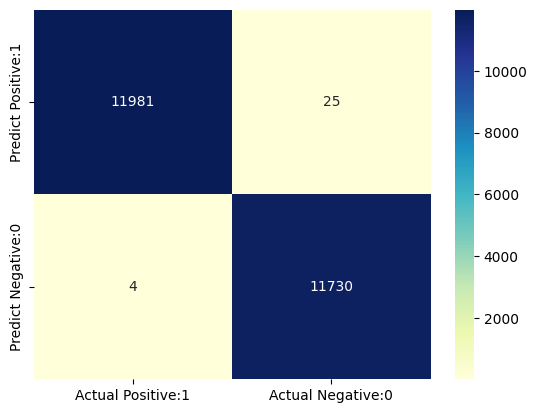

In [ ]:
sns.heatmap(cm_matrix, annot=True,fmt='d',cmap='YlGnBu')

# **Undersampling with decision tree classifier**

In [ ]:
de = pd.read_csv("/content/creditcard.csv")

In [ ]:
de=de.dropna()

In [ ]:
Xe = de.drop('Class',axis=1)
ye = de['Class']

In [ ]:
Xe.shape

(67433, 30)

In [ ]:
ye.shape

(67433,)

In [ ]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)

In [ ]:
Xe2, ye2 = undersample.fit_resample(Xe, ye)

In [ ]:
from sklearn.model_selection import train_test_split
X_traine,X_teste,y_traine,y_teste = train_test_split(Xe2,ye2,test_size=0.20,
                                                 random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier()
dt2.fit(X_traine,y_traine)

In [ ]:
y_pred3 = dt.predict(X_teste)

In [ ]:
cm2 = confusion_matrix(y_teste, y_pred3)
print(cm2)

[[38  0]
 [ 1 29]]


In [ ]:
accuracy2 = accuracy_score(y_teste, y_pred3)
precision2 = precision_score(y_teste, y_pred3)
recall2= recall_score(y_teste, y_pred3)
f1_2 = f1_score(y_teste, y_pred3)
roc_auc_2 = roc_auc_score(y_teste, y_pred3)

In [ ]:
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 score:", f1_2)
print("ROC AUC score:", roc_auc_2)

Accuracy: 0.9852941176470589
Precision: 1.0
Recall: 0.9666666666666667
F1 score: 0.983050847457627
ROC AUC score: 0.9833333333333334


In [ ]:
cm_matrix2=pd.DataFrame(data=cm2,columns=['Actual Positive:1','Actual Negative:0'],
                       index=['Predict Positive:1','Predict Negative:0'])
print(cm_matrix2)

                    Actual Positive:1  Actual Negative:0
Predict Positive:1                 38                  0
Predict Negative:0                  1                 29


<Axes: >

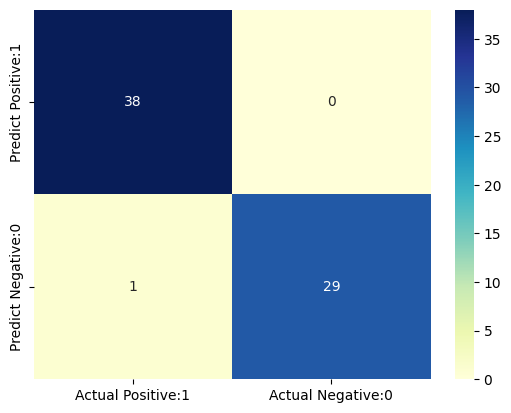

In [ ]:
sns.heatmap(cm_matrix2, annot=True,fmt='d',cmap='YlGnBu')